In [1]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
# spark_path = "D:/spark-2.1.0-bin-hadoop2.7"
spark_path = "D:/its/big_data/spark/"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf
import numpy as np

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [42]:
na_values = ['NO CLUE', 'N/A']
ufo = pd.read_csv('complete.csv', na_values=na_values, error_bad_lines=False)

ufo

Skipping line 878: expected 11 fields, saw 12
Skipping line 1713: expected 11 fields, saw 12
Skipping line 1815: expected 11 fields, saw 12
Skipping line 2858: expected 11 fields, saw 12
Skipping line 3734: expected 11 fields, saw 12
Skipping line 4756: expected 11 fields, saw 12
Skipping line 5389: expected 11 fields, saw 12
Skipping line 5423: expected 11 fields, saw 12
Skipping line 5614: expected 11 fields, saw 12
Skipping line 5849: expected 11 fields, saw 12
Skipping line 6093: expected 11 fields, saw 12
Skipping line 7516: expected 11 fields, saw 12
Skipping line 7626: expected 11 fields, saw 12
Skipping line 8893: expected 11 fields, saw 12
Skipping line 9015: expected 11 fields, saw 12
Skipping line 9571: expected 11 fields, saw 12
Skipping line 9620: expected 11 fields, saw 12
Skipping line 9751: expected 11 fields, saw 12
Skipping line 10157: expected 11 fields, saw 12
Skipping line 10427: expected 11 fields, saw 12
Skipping line 12035: expected 11 fields, saw 12
Skipping li

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


In [43]:
float_with_character = ufo['latitude'].str.contains("[a-zA-Z]").fillna(False)
len(ufo[float_with_character])

1

In [44]:
ufo[float_with_character]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
48461,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,33q.200088,-105.624152


In [45]:
tmp = ufo
tmp

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


In [46]:
tmp[float_with_character]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
48461,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,33q.200088,-105.624152


In [47]:
tmp['latitude'] = pd.Series(tmp['latitude']).str.replace('q','')

In [48]:
tmp[float_with_character]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
48461,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,33.200088,-105.624152


In [49]:
ufo['latitude'] = ufo['latitude'].str.replace(r'a-zA-Z','').astype('float')

In [50]:
ufo.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object

In [52]:
ufo['latitude'].mean()
ufo['longitude'].mean()

-85.0218364281644

In [53]:
ufo['state'].unique()
num_state = len(ufo['state'])
num_unique_state = len(ufo['state'].unique())

print 'State total is %s, unique is %s' % (num_state, num_unique_state)

State total is 88679, unique is 69


In [54]:
country_not_nan = ufo['country'] != np.nan
country_not_nan
ufo[country_not_nan][['state','country']]

,state,country
0,tx,us
1,tx,NaN
2,NaN,gb
3,tx,us
4,hi,us
5,tn,us
6,NaN,gb
7,ct,us
8,al,us
9,fl,us


In [55]:
list_state = ufo[['state','country']]

state_not_nan = list_state[list_state['state'].notnull() & list_state['country'].notnull()]

In [56]:
state_not_nan.sort('state')

C:\Users\exod\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,state,country
33773,ab,ca
70965,ab,ca
17505,ab,ca
37688,ab,ca
25747,ab,ca
70946,ab,ca
56179,ab,ca
65639,ab,ca
73985,ab,ca
8910,ab,ca


In [57]:
state_latitude = ufo[['state', 'latitude']].sort('state')
state_latitude_no_nan = state_latitude[state_latitude['state'].notnull() & state_latitude['latitude'].notnull()]
state_latitude_no_nan

C:\Users\exod\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,state,latitude
44450,ab,51.083333
28707,ab,51.083333
40215,ab,51.083333
43542,ab,53.933271
56332,ab,51.083333
27906,ab,51.083333
39675,ab,51.083333
47411,ab,51.083333
14836,ab,53.550000
21680,ab,53.550000


In [58]:
average_latitude_of_state = state_latitude.groupby('state').mean()
average_latitude_of_state

,latitude
state,
ab,52.086466
ak,59.513229
al,32.574865
ar,34.630106
az,33.401684
bc,49.316414
ca,35.613186
co,38.715190
ct,41.196994


In [59]:
ufo[ufo['latitude'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
65536,7/22/2011 23:00,new smyrna beach,fl,us,fireball,30,30 seconds,Fireball and explosion in the sky over N. Cent...,8/7/2011,NaN,-80.927222
65537,7/22/2011 23:00,white mountains,nh,NaN,disk,120,2 min,Picture of saucers in NH,3/16/2012,NaN,-71.368141
65538,7/22/2011 23:15,spokane valley,wa,us,disk,600,10 minutes,Bright&#44 Strobing Arc-Shaped light hovering ...,8/21/2011,NaN,-117.238333
65539,7/22/2011 23:55,huntersville,nc,us,NaN,0,NaN,UFO 10-12 yards away from us&#33 It shines it&...,8/7/2011,NaN,-80.843056
65540,7/22/2012 00:00,brandon,fl,us,fireball,300,5 minutes,Fireballs over Brandon Florida,8/5/2012,NaN,-82.286111
65541,7/22/2012 00:30,timmins (canada),on,ca,sphere,1800,30 minutes,3 sphere shaped lights that are orange/red in ...,8/5/2012,NaN,-81.333333
65542,7/22/2012 02:00,charlotte,mi,us,light,3600,1 hour,Several pulsating lights performing impossible...,8/5/2012,NaN,-84.835833
65543,7/22/2012 03:00,boulder,co,us,light,10800,3 hours,4 bright lights observed for 3 hours above Bou...,8/5/2012,NaN,-105.270000
65544,7/22/2012 03:00,east helena,mt,us,circle,0,very short,Heard three womb womb womb saw blue orb in sky...,11/4/2012,NaN,-111.914722
65545,7/22/2012 03:00,wagoner,ok,us,triangle,20,20 seconds,Low flying silent triangular shape with green ...,8/5/2012,NaN,-95.369167


In [60]:
tmp

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.586111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.294722,-82.984167


In [61]:
tmp['latitude']

0        29.883056
1        29.384210
2        53.200000
3        28.978333
4        21.418056
5        36.595000
6        51.434722
7        41.117500
8        33.586111
9        30.294722
10       33.916389
11       35.233333
12       40.668611
13       37.153611
14       35.823889
15       36.843056
16       42.537778
17       41.325278
18       32.364167
19        0.000000
20       42.391667
21       51.500000
22       38.105556
23       32.854444
24       45.582778
25       51.783333
26       29.423889
27       38.254167
28       40.700833
29       41.700278
           ...    
88649          NaN
88650          NaN
88651          NaN
88652          NaN
88653          NaN
88654          NaN
88655          NaN
88656          NaN
88657          NaN
88658          NaN
88659          NaN
88660          NaN
88661          NaN
88662          NaN
88663          NaN
88664          NaN
88665          NaN
88666          NaN
88667          NaN
88668          NaN
88669          NaN
88670       

In [62]:
def getAvgOfState(state):
    avg = state_latitude_no_nan[state_latitude_no_nan['state'] == state].mean()
    return avg

In [63]:
test = ufo

In [64]:
# print rows yang latitude nya null


lat_nan = test['latitude'].isnull().fillna(False)
len(test[lat_nan])

test[lat_nan]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
65536,7/22/2011 23:00,new smyrna beach,fl,us,fireball,30,30 seconds,Fireball and explosion in the sky over N. Cent...,8/7/2011,NaN,-80.927222
65537,7/22/2011 23:00,white mountains,nh,NaN,disk,120,2 min,Picture of saucers in NH,3/16/2012,NaN,-71.368141
65538,7/22/2011 23:15,spokane valley,wa,us,disk,600,10 minutes,Bright&#44 Strobing Arc-Shaped light hovering ...,8/21/2011,NaN,-117.238333
65539,7/22/2011 23:55,huntersville,nc,us,NaN,0,NaN,UFO 10-12 yards away from us&#33 It shines it&...,8/7/2011,NaN,-80.843056
65540,7/22/2012 00:00,brandon,fl,us,fireball,300,5 minutes,Fireballs over Brandon Florida,8/5/2012,NaN,-82.286111
65541,7/22/2012 00:30,timmins (canada),on,ca,sphere,1800,30 minutes,3 sphere shaped lights that are orange/red in ...,8/5/2012,NaN,-81.333333
65542,7/22/2012 02:00,charlotte,mi,us,light,3600,1 hour,Several pulsating lights performing impossible...,8/5/2012,NaN,-84.835833
65543,7/22/2012 03:00,boulder,co,us,light,10800,3 hours,4 bright lights observed for 3 hours above Bou...,8/5/2012,NaN,-105.270000
65544,7/22/2012 03:00,east helena,mt,us,circle,0,very short,Heard three womb womb womb saw blue orb in sky...,11/4/2012,NaN,-111.914722
65545,7/22/2012 03:00,wagoner,ok,us,triangle,20,20 seconds,Low flying silent triangular shape with green ...,8/5/2012,NaN,-95.369167


In [65]:
latitude_nan = test['latitude'].isnull()
test['state'][latitude_nan].unique()

array(['fl', 'nh', 'wa', 'nc', 'on', 'mi', 'co', 'mt', 'ok', 'pa', 'ca',
       'ma', 'tn', 'md', 'or', 'ak', 'nj', 'mo', 'az', 'sc', 'ky', 'nb',
       'ny', 'id', 'va', 'ut', 'bc', 'ar', nan, 'il', 'wi', 'me', 'oh',
       'tx', 'ia', 'nv', 'mn', 'dc', 'de', 'ab', 'pq', 'ne', 'ns', 'in',
       'ga', 'ms', 'nm', 'al', 'wy', 'ks', 'nf', 'ri', 'vt', 'ct', 'nt',
       'la', 'hi', 'qc', 'wv', 'nd', 'sd', 'mb', 'sk', 'sa', 'pe', 'yt',
       'yk', 'pr'], dtype=object)

In [66]:
# isi latitude berdasarkan rata2 dari group state,


test['latitude'] = test.groupby('state').transform(lambda x: x.fillna(x.mean()))

In [67]:
test.count()

datetime                88679
city                    88679
state                   81270
country                 76314
shape                   85757
duration (seconds)      88677
duration (hours/min)    85662
comments                88644
date posted             88679
latitude                87010
longitude               88679
dtype: int64

In [68]:
drop = test
toFix = test

In [69]:
# select data whose latitude and longitude not nan

toFix = toFix[toFix['latitude'].notnull() & toFix['longitude'].notnull()]

In [70]:
toFix.count()

datetime                87010
city                    87010
state                   81270
country                 75680
shape                   84142
duration (seconds)      87009
duration (hours/min)    84077
comments                86975
date posted             87010
latitude                87010
longitude               87010
dtype: int64

In [71]:
from sklearn.cluster import KMeans

In [72]:
k = 10

toRender = toFix[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=k, n_init=1, init="random").fit(toRender)

In [73]:
kmeans.labels_

array([5, 5, 4, ..., 5, 1, 2])

In [74]:
cmap = plt.get_cmap('jet')
colormap = cmap(np.linspace(0, 1, k))

a=kmeans.predict(toRender)
b=toRender        
c=np.mat(b)

<function matplotlib.pyplot.show>

C:\Users\exod\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


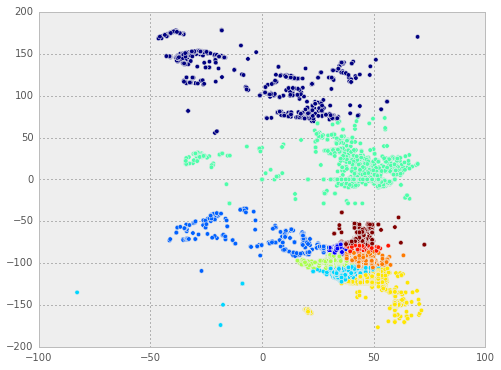

In [75]:
plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.scatter(c[:,0], c[:,1], c=colormap[kmeans.labels_], s=20)  
plt.show